In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

/var/folders/_9/j54ltg0d4f37pmf_p10lk54m0000gq/T/ipykernel_14211/2555990689.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  prcp_plot.set_xticklabels(prcp_df["Date"], rotation=90)


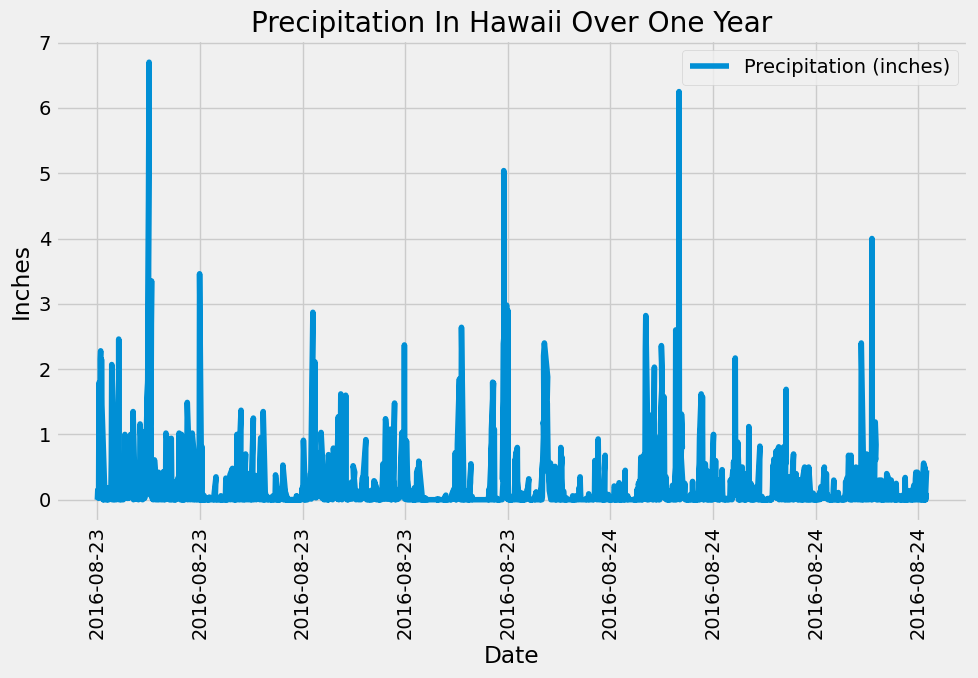

In [10]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

year_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago, measurement.prcp != None).\
    order_by(measurement.date).all()

df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation (inches)'])
prcp_df = df.sort_values(by=['Date'], ascending=True)


prcp_plot = prcp_df.plot(figsize=(10,7))
prcp_plot.set_xticklabels(prcp_df["Date"], rotation=90)
plt.title("Precipitation In Hawaii Over One Year")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation (inches)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(measurement.station).distinct().count()
stations_count

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_summary = session.query(func.min(measurement.tobs),
                             func.max(measurement.tobs),
                             func.avg(measurement.tobs)).\
                            filter(measurement.station == 'USC00519281').\
                            order_by(func.min(measurement.tobs)).all()
temp_summary

[(54.0, 85.0, 71.66378066378067)]

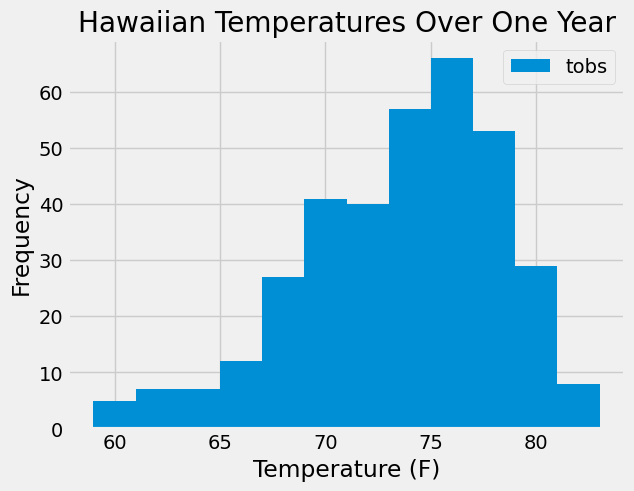

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(measurement.tobs).\
    filter(measurement.date >= year_ago, measurement.station == 'USC00519281').\
    order_by(measurement.tobs).all()

temp_df = pd.DataFrame(year_temp, columns=['Temperature (F)'])

temp_df.hist(bins=12)
plt.title('Hawaiian Temperatures Over One Year')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(["tobs"])

# Close Session

In [17]:
# Close Session
session.close()